# San Francisco Neighborhoods: Analysis of Median Income and Venues per capita

## Applied Data Science Capstone by IBM/Coursera

In [1]:
#------------------------------------------------------------------
#Notebook: Coursera-Capstone-SF neighborhoods.ipynb
#Date created: 2021-5-24
#Python version: 3.8.5
#------------------------------------------------------------------

In [2]:
from bs4 import BeautifulSoup as Soup #library for webscraping
import numpy as np #library for vectorized computation
import pandas as pd #library to process data as dataframes
import requests #library to make HTTP requests
import matplotlib.pyplot as plt #library for plotting of data
import seaborn as sns

## Getting data for San Francisco neighborhoods

This section of the code will focus on obtaining the key neighborhood data for the San Francisco (SF) neighborhoods. This data includes:
- Zipcode
- Latitude and longitude coordinates
- Population
- Median Income
- Neighborhood name

All data will be gathered from publicly available data sources and combined into a Pandas dataframe for further cleaning and downstream analysis.

### Create the initial SF neighborhood dataframe
Initial SF neighborhood data is scraped from ['the Zipatlas website for SF'](http://zipatlas.com/us/ca/san-francisco/zip-code-comparison/median-household-income.htm).

This website contains all the critical data values (zipcode, lat/long coordinates, population, and median income). The population and median income values are from an old census and will be replaced later in the code with updated 2019 census data.

In [3]:
#Define the website URL for the San Francisco neighborhoods data to be scraped
url = 'http://zipatlas.com/us/ca/san-francisco/zip-code-comparison/median-household-income.htm'

#Get the data and create a BeautifulSoup object of the Toronto wiki site
url_resp = requests.get(url)
url_soup = Soup(url_resp.text)

#Get the first table from the website that includes the postal codes, lat/long, population, and median income
tables = url_soup.findAll('table')

In [4]:
# initialize an empty list to hold the data from the table
table_contents = []

# iterate through each row of the table and scrape the data for zipcode, latitue, longitude, population, and median income
# the data is located in the 14th table on the website
for i,row  in enumerate(tables[13].findAll('tr')):
    cell = {}
    # skip the first row of the table
    if i>0:
        td_list = row.findAll('td')
        # get the population data and covert it to an integer
        population = int(td_list[4].text.replace(',',''))
        
        # only get data for zipcodes with population > 0
        if population>0:
            cell['Zipcode']= td_list[1].text
            cell['Latitude']= float(td_list[2].text.split(',')[0])
            cell['Longitude']= float(td_list[2].text.split(',')[1].strip(' '))
            cell['Population']= population
            cell['Median Income']= int(td_list[5].text.replace(',','').replace('$','').split('.')[0])
            table_contents.append(cell)

# convert table data into a Pandas dataframe
sf_df = pd.DataFrame(table_contents)

#increase the max column width displayed for a dataframe so it is easier to see Neighborhoods
pd.set_option('max_colwidth', 100)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# sort the dataframe by zipcode
sf_df.sort_values(by=['Zipcode'],inplace=True)
sf_df

,Zipcode,Latitude,Longitude,Population,Median Income
24,94102,37.779500,-122.419233,28991,22351
23,94103,37.773147,-122.411287,23016,31131
25,94104,37.791222,-122.402241,374,14609
1,94105,37.789168,-122.395009,2058,88976
11,94107,37.768881,-122.395521,17368,61362
22,94108,37.791998,-122.408653,13716,31542
19,94109,37.794487,-122.422270,56322,43444
18,94110,37.750021,-122.415201,74633,53795
14,94111,37.801776,-122.402293,3335,56569
13,94112,37.720498,-122.443119,73104,57629


### Get the most recent 2019 census data for population by zipcode for SF neighborhoods

The most recent 2019 census data can be accessed at the ['US Census Data website'](https://data.census.gov). While there is an available API, for the purpose of this project it was easier to download the relevant tables in CSV format and then read the data directly into a dataframe using the Pandas read_csv function.

If working with the US Census Data website, the following data can be accessed from Table ID DP05, then filtering by geography and selecting only the SF zipcodes. The table can then be downloaded into CSV format.

In [5]:
# update the population with 2019 census data
# population data for each zipcode obtained from 2019 US Census Data at https://data.census.gov
# Table ID DPO5
# csv exported from the US Census data website

# read in the csv file data into a Pandas dataframe
pop_df = pd.read_csv('SF population zipcode 2019.csv')
# check out the dataframe
pop_df.head()

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0001PE,DP05_0001PM,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,DP05_0003E,DP05_0003M,DP05_0003PE,DP05_0003PM,DP05_0004E,DP05_0004M,DP05_0004PE,DP05_0004PM,DP05_0005E,DP05_0005M,DP05_0005PE,DP05_0005PM,DP05_0006E,DP05_0006M,DP05_0006PE,DP05_0006PM,DP05_0007E,DP05_0007M,DP05_0007PE,DP05_0007PM,DP05_0008E,DP05_0008M,DP05_0008PE,DP05_0008PM,DP05_0009E,DP05_0009M,DP05_0009PE,DP05_0009PM,DP05_0010E,DP05_0010M,DP05_0010PE,DP05_0010PM,DP05_0011E,DP05_0011M,DP05_0011PE,DP05_0011PM,DP05_0012E,DP05_0012M,DP05_0012PE,DP05_0012PM,DP05_0013E,DP05_0013M,DP05_0013PE,DP05_0013PM,DP05_0014E,DP05_0014M,DP05_0014PE,DP05_0014PM,DP05_0015E,DP05_0015M,DP05_0015PE,DP05_0015PM,DP05_0016E,DP05_0016M,DP05_0016PE,DP05_0016PM,DP05_0017E,DP05_0017M,DP05_0017PE,DP05_0017PM,DP05_0018E,DP05_0018M,DP05_0018PE,DP05_0018PM,DP05_0019E,DP05_0019M,DP05_0019PE,DP05_0019PM,DP05_0020E,DP05_0020M,DP05_0020PE,DP05_0020PM,DP05_0021E,DP05_0021M,DP05_0021PE,DP05_0021PM,DP05_0022E,DP05_0022M,DP05_0022PE,DP05_0022PM,DP05_0023E,DP05_0023M,DP05_0023PE,DP05_0023PM,DP05_0024E,DP05_0024M,DP05_0024PE,DP05_0024PM,DP05_0025E,DP05_0025M,DP05_0025PE,DP05_0025PM,DP05_0026E,DP05_0026M,DP05_0026PE,DP05_0026PM,DP05_0027E,DP05_0027M,DP05_0027PE,DP05_0027PM,DP05_0028E,DP05_0028M,DP05_0028PE,DP05_0028PM,DP05_0029E,DP05_0029M,DP05_0029PE,DP05_0029PM,DP05_0030E,DP05_0030M,DP05_0030PE,DP05_0030PM,DP05_0031E,DP05_0031M,DP05_0031PE,DP05_0031PM,DP05_0032E,DP05_0032M,DP05_0032PE,DP05_0032PM,DP05_0033E,DP05_0033M,DP05_0033PE,DP05_0033PM,DP05_0034E,DP05_0034M,DP05_0034PE,DP05_0034PM,DP05_0035E,DP05_0035M,DP05_0035PE,DP05_0035PM,DP05_0036E,DP05_0036M,DP05_0036PE,DP05_0036PM,DP05_0037E,DP05_0037M,DP05_0037PE,DP05_0037PM,DP05_0038E,DP05_0038M,DP05_0038PE,DP05_0038PM,DP05_0039E,DP05_0039M,DP05_0039PE,DP05_0039PM,DP05_0040E,DP05_0040M,DP05_0040PE,DP05_0040PM,DP05_0041E,DP05_0041M,DP05_0041PE,DP05_0041PM,DP05_0042E,DP05_0042M,DP05_0042PE,DP05_0042PM,DP05_0043E,DP05_0043M,DP05_0043PE,DP05_0043PM,DP05_0044E,DP05_0044M,DP05_0044PE,DP05_0044PM,DP05_0045E,DP05_0045M,DP05_0045PE,DP05_0045PM,DP05_0046E,DP05_0046M,DP05_0046PE,DP05_0046PM,DP05_0047E,DP05_0047M,DP05_0047PE,DP05_0047PM,DP05_0048E,DP05_0048M,DP05_0048PE,DP05_0048PM,DP05_0049E,DP05_0049M,DP05_0049PE,DP05_0049PM,DP05_0050E,DP05_0050M,DP05_0050PE,DP05_0050PM,DP05_0051E,DP05_0051M,DP05_0051PE,DP05_0051PM,DP05_0052E,DP05_0052M,DP05_0052PE,DP05_0052PM,DP05_0053E,DP05_0053M,DP05_0053PE,DP05_0053PM,DP05_0054E,DP05_0054M,DP05_0054PE,DP05_0054PM,DP05_0055E,DP05_0055M,DP05_0055PE,DP05_0055PM,DP05_0056E,DP05_0056M,DP05_0056PE,DP05_0056PM,DP05_0057E,DP05_0057M,DP05_0057PE,DP05_0057PM,DP05_0058E,DP05_0058M,DP05_0058PE,DP05_0058PM,DP05_0059E,DP05_0059M,DP05_0059PE,DP05_0059PM,DP05_0060E,DP05_0060M,DP05_0060PE,DP05_0060PM,DP05_0061E,DP05_0061M,DP05_0061PE,DP05_0061PM,DP05_0062E,DP05_0062M,DP05_0062PE,DP05_0062PM,DP05_0063E,DP05_0063M,DP05_0063PE,DP05_0063PM,DP05_0064E,DP05_0064M,DP05_0064PE,DP05_0064PM,DP05_0065E,DP05_0065M,DP05_0065PE,DP05_0065PM,DP05_0066E,DP05_0066M,DP05_0066PE,DP05_0066PM,DP05_0067E,DP05_0067M,DP05_0067PE,DP05_0067PM,DP05_0068E,DP05_0068M,DP05_0068PE,DP05_0068PM,DP05_0069E,DP05_0069M,DP05_0069PE,DP05_0069PM,DP05_0070E,DP05_0070M,DP05_0070PE,DP05_0070PM,DP05_0071E,DP05_0071M,DP05_0071PE,DP05_0071PM,DP05_0072E,DP05_0072M,DP05_0072PE,DP05_0072PM,DP05_0073E,DP05_0073M,DP05_0073PE,DP05_0073PM,DP05_0074E,DP05_0074M,DP05_0074PE,DP05_0074PM,DP05_0075E,DP05_0075M,DP05_0075PE,DP05_0075PM,DP05_0076E,DP05_0076M,DP05_0076PE,DP05_0076PM,DP05_0077E,DP05_0077M,DP05_0077PE,DP05_0077PM,DP05_0078E,DP05_0078M,DP05_0078PE,DP05_0078PM,DP05_0079E,DP05_0079M,DP05_0079PE,DP05_0079PM,DP05_0080E,DP05_0080M,DP05_0080PE,DP05_0080PM,DP05_0081E,DP05_0081M,DP05_0081PE,DP05_0081PM,DP05_0082E,DP05_0082M,DP05_0082PE,DP05_0082PM,DP05_0083E,DP05_0083M,DP05_0083PE,DP05_0083PM,DP05_0084E,DP05_0084M,DP05_0084PE,DP05_0084PM,DP05_0085E,DP05_0085M,DP05_0085PE,DP05_0085PM,DP05_0086E,DP05_0086M,DP05_0086PE,DP05_0086PM,DP05_0087E,DP05_0087M,DP05_0087

In [6]:
# update dataframe to only use the 2nd and 3rd columns, which include zipcode and total population
pop_df = pop_df.iloc[:,1:3]

# rename the columns to Zipcode and Population 2019
pop_df.columns = ['Zipcode','Population 2019']

# drop the first row
pop_df.drop([0], inplace=True)
pop_df.head()

,Zipcode,Population 2019
1,ZCTA5 94102,31392
2,ZCTA5 94103,30703
3,ZCTA5 94104,429
4,ZCTA5 94105,10916
5,ZCTA5 94107,31461


### Get the most recent 2019 census data for median income by zipcode for SF neighborhoods

The most recent 2019 census data can be accessed at the ['US Census Data website'](https://data.census.gov). While there is an available API, for the purpose of this project it was easier to download the relevant tables in CSV format and then read the data directly into a dataframe using the Pandas read_csv function.

If working with the US Census Data website, the following data can be accessed from Table ID B19013, then filtering by geography and selecting only the SF zipcodes. The table can then be downloaded into CSV format.

In [7]:
# update the median income with 2019 census data
# population data for each zipcode obtained from 2019 US Census Data at https://data.census.gov
# Table ID B19013
# csv exported from the US Census data website

# read in the csv file data into a Pandas dataframe
income_df = pd.read_csv('SF median income 2019.csv')
# check out the dataframe
income_df.head()

,GEO_ID,NAME,B19013_001E,B19013_001M
0,id,Geographic Area Name,Estimate!!Median household income in the past 12 months (in 2019 inflation-adjusted dollars),Margin of Error!!Median household income in the past 12 months (in 2019 inflation-adjusted dollars)
1,8600000US94102,ZCTA5 94102,46372,4131
2,8600000US94103,ZCTA5 94103,75764,13298
3,8600000US94104,ZCTA5 94104,51500,25690
4,8600000US94105,ZCTA5 94105,213987,34746


In [8]:
# update dataframe to only use the 2nd and 3rd columns
income_df = income_df.iloc[:,1:3]

# rename the columns to Zipcode and Population 2019
income_df.columns = ['Zipcode','Median Income 2019']

# drop the first row
income_df.drop([0], inplace=True)
income_df.head()

,Zipcode,Median Income 2019
1,ZCTA5 94102,46372
2,ZCTA5 94103,75764
3,ZCTA5 94104,51500
4,ZCTA5 94105,213987
5,ZCTA5 94107,166985


### Update and clean the SF neighborhoods dataframe
This section of code merges all the dataframes together by zipcode and drops the columns for the outdated Population and Median Income data. The combined dataframe includes the most up-to-date data for all the SF neighborhoods.

The data is also cleaned for downstream data analysis. To ensure that neighborhoods with small populations do not skew any downstream anlysis, all neighborhoods with a population less than 10,000 people are dropped from the dataframe. In total, there are 5 neighborhoods that meet this criteria.

In [9]:
# merge the updated 2019 population and median income dataframes by zipcode
merged_2019 = pop_df.merge(income_df,on='Zipcode')
merged_2019

,Zipcode,Population 2019,Median Income 2019
0,ZCTA5 94102,31392,46372
1,ZCTA5 94103,30703,75764
2,ZCTA5 94104,429,51500
3,ZCTA5 94105,10916,213987
4,ZCTA5 94107,31461,166985
5,ZCTA5 94108,14143,63263
6,ZCTA5 94109,57302,94278
7,ZCTA5 94110,72380,134592
8,ZCTA5 94111,3611,120905
9,ZCTA5 94112,84707,94757


In [10]:
# edit the Zipcode text to keep only the 5-digit zipcode
merged_2019['Zipcode'] = merged_2019['Zipcode'].str.split(' ').str[1]

In [11]:
# merge the original sf_df dataframe with the updated 2019 population and median income dataframe
sf_df = sf_df.merge(merged_2019, on='Zipcode')

# drop the old Population and Median Income columns
sf_df.drop(['Population','Median Income'], axis=1, inplace=True)

# change the data types for Population 2019 and Median Income 2019 to int type
sf_df['Population 2019'] = sf_df['Population 2019'].astype(int)
sf_df['Median Income 2019'] = sf_df['Median Income 2019'].astype(int)

sf_df

,Zipcode,Latitude,Longitude,Population 2019,Median Income 2019
0,94102,37.779500,-122.419233,31392,46372
1,94103,37.773147,-122.411287,30703,75764
2,94104,37.791222,-122.402241,429,51500
3,94105,37.789168,-122.395009,10916,213987
4,94107,37.768881,-122.395521,31461,166985
5,94108,37.791998,-122.408653,14143,63263
6,94109,37.794487,-122.422270,57302,94278
7,94110,37.750021,-122.415201,72380,134592
8,94111,37.801776,-122.402293,3611,120905
9,94112,37.720498,-122.443119,84707,94757


In [12]:
# for meaningful downstream data analysis, drop all zipcodes/neighborhoods with population less than 10,000
sf_df = sf_df[sf_df['Population 2019']>=10000]
sf_df

,Zipcode,Latitude,Longitude,Population 2019,Median Income 2019
0,94102,37.779500,-122.419233,31392,46372
1,94103,37.773147,-122.411287,30703,75764
3,94105,37.789168,-122.395009,10916,213987
4,94107,37.768881,-122.395521,31461,166985
5,94108,37.791998,-122.408653,14143,63263
6,94109,37.794487,-122.422270,57302,94278
7,94110,37.750021,-122.415201,72380,134592
9,94112,37.720498,-122.443119,84707,94757
10,94114,37.758085,-122.434801,34918,162193
11,94115,37.786031,-122.437301,34604,123037


### Get neighborhood names and add to the dataframe
The SF neigborhood names are scraped from ['the San Francisco Burden of Disease & Injury Study website'](http://www.healthysf.org/bdi/outcomes/zipmap.htm) into a Pandas dataframe. The dataframe is then merged with the SF Neighborhoods dataframe by zipcode, thereby producing the finalized SF neighborhood dataframe with all the relevant and up to date data.

In [13]:
# web url to get the SF neighborhoods by zipcode
url2 = 'http://www.healthysf.org/bdi/outcomes/zipmap.htm'

#Get the data and create a BeautifulSoup object of the Toronto wiki site
url2_resp = requests.get(url2)
url2_soup = Soup(url2_resp.text)

#Get the first table from the website that includes the postal codes, lat/long, population, and median income
tables2 = url2_soup.findAll('table')

In [14]:
# initialize an empty list to hold the data from the table
table_contents2 = []

# iterate through each row of the table and scrape the data for zipcode neighborhood name
# the data is located in the 3rd table on the website
for i,row  in enumerate(tables2[2].findAll('tr')):
    cell = {}
    
    # the data is contained is rows 2-24, skip all other rows in the table
    if i>1 and i<23:
        td_list = row.findAll('td')
        
        cell['Zipcode']= td_list[0].text
        cell['Neighborhood']= td_list[1].text.replace('\n','').replace('/',', ')
        table_contents2.append(cell)

# convert table data into a Pandas dataframe
neighborhoods = pd.DataFrame(table_contents2)
neighborhoods

,Zipcode,Neighborhood
0,94102,"Hayes Valley, Tenderloin, North of Market"
1,94103,South of Market
2,94107,Potrero Hill
3,94108,Chinatown
4,94109,"Polk, Russian Hill (Nob Hill)"
5,94110,"Inner Mission, Bernal Heights"
6,94112,"Ingelside-Excelsior, Crocker-Amazon"
7,94114,"Castro, Noe Valley"
8,94115,"Western Addition, Japantown"
9,94116,"Parkside, Forest Hill"


In [15]:
# merge the two databases based on the Zipcode and preserving sf_df data by using a left merge
# if the zipcode does not exist in the neighborhoods dataframe, then the neighborhood will be specified as NaN
sf_neighborhoods_df = pd.merge(sf_df, neighborhoods, on='Zipcode', how='left')

# view the merged dataframe with all neighborhood data
sf_neighborhoods_df

,Zipcode,Latitude,Longitude,Population 2019,Median Income 2019,Neighborhood
0,94102,37.779500,-122.419233,31392,46372,"Hayes Valley, Tenderloin, North of Market"
1,94103,37.773147,-122.411287,30703,75764,South of Market
2,94105,37.789168,-122.395009,10916,213987,NaN
3,94107,37.768881,-122.395521,31461,166985,Potrero Hill
4,94108,37.791998,-122.408653,14143,63263,Chinatown
5,94109,37.794487,-122.422270,57302,94278,"Polk, Russian Hill (Nob Hill)"
6,94110,37.750021,-122.415201,72380,134592,"Inner Mission, Bernal Heights"
7,94112,37.720498,-122.443119,84707,94757,"Ingelside-Excelsior, Crocker-Amazon"
8,94114,37.758085,-122.434801,34918,162193,"Castro, Noe Valley"
9,94115,37.786031,-122.437301,34604,123037,"Western Addition, Japantown"


In [16]:
# We see the only missing neighborhood is for  zipcode 94105
# An online search shows the neighborhood name for this zipcode is Financial District, SOMA. 
# Data found at https://www.zipdatamaps.com/94105 in the section Neighborhoods
# Update the dataframe with this information
sf_neighborhoods_df.loc[sf_neighborhoods_df['Zipcode']=='94105','Neighborhood'] = 'Financial District, South of Market'

sf_neighborhoods_df

,Zipcode,Latitude,Longitude,Population 2019,Median Income 2019,Neighborhood
0,94102,37.779500,-122.419233,31392,46372,"Hayes Valley, Tenderloin, North of Market"
1,94103,37.773147,-122.411287,30703,75764,South of Market
2,94105,37.789168,-122.395009,10916,213987,"Financial District, South of Market"
3,94107,37.768881,-122.395521,31461,166985,Potrero Hill
4,94108,37.791998,-122.408653,14143,63263,Chinatown
5,94109,37.794487,-122.422270,57302,94278,"Polk, Russian Hill (Nob Hill)"
6,94110,37.750021,-122.415201,72380,134592,"Inner Mission, Bernal Heights"
7,94112,37.720498,-122.443119,84707,94757,"Ingelside-Excelsior, Crocker-Amazon"
8,94114,37.758085,-122.434801,34918,162193,"Castro, Noe Valley"
9,94115,37.786031,-122.437301,34604,123037,"Western Addition, Japantown"


In [17]:
# set the index for the dataframe to be the zipcode
sf_neighborhoods_df.set_index('Zipcode',inplace=True)
sf_neighborhoods_df.head()

,Latitude,Longitude,Population 2019,Median Income 2019,Neighborhood
Zipcode,,,,,
94102,37.779500,-122.419233,31392,46372,"Hayes Valley, Tenderloin, North of Market"
94103,37.773147,-122.411287,30703,75764,South of Market
94105,37.789168,-122.395009,10916,213987,"Financial District, South of Market"
94107,37.768881,-122.395521,31461,166985,Potrero Hill
94108,37.791998,-122.408653,14143,63263,Chinatown


### Initial visualization of the SF neighborhood data
Some basic bar charts and histograms of the SF neighborhood data are generated to get an idea of the population and income distribution in SF.

In [18]:
sf_neighborhoods_df.sort_values(by='Median Income 2019')

,Latitude,Longitude,Population 2019,Median Income 2019,Neighborhood
Zipcode,,,,,
94102,37.779500,-122.419233,31392,46372,"Hayes Valley, Tenderloin, North of Market"
94108,37.791998,-122.408653,14143,63263,Chinatown
94124,37.731505,-122.384532,35747,63267,Bayview-Hunters Point
94133,37.802071,-122.411004,26796,69756,"North Beach, Chinatown"
94103,37.773147,-122.411287,30703,75764,South of Market
94134,37.721052,-122.413573,42418,77983,"Visitacion Valley, Sunnydale"
94132,37.722302,-122.491129,31436,84349,Lake Merced
94109,37.794487,-122.422270,57302,94278,"Polk, Russian Hill (Nob Hill)"
94112,37.720498,-122.443119,84707,94757,"Ingelside-Excelsior, Crocker-Amazon"


### Histogram of median incomes
A histogram is created for the SF neighborhoods for the median income data. The 22 neighborhoods are binned into 8 groups. The histogram shows a skewed distribution with more neighborhoods having median incomes below $130,000 (14 neighborhoods) than above (8 neighborhoods). 

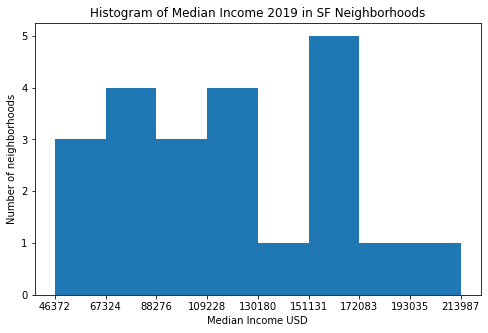

In [19]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(sf_neighborhoods_df['Median Income 2019'],bins=8)

# create a histogram plot of median incomes for the SF neighborhoods
sf_neighborhoods_df['Median Income 2019'].plot(kind='hist', bins=8, figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Median Income 2019 in SF Neighborhoods') # add a title to the histogram
plt.ylabel('Number of neighborhoods') # add y-label
plt.xlabel('Median Income USD') # add x-label

plt.show()

### Median income of a neighborhood vs. Population
A chart is created to show the relationship between median income of a neighborhood and its total population. The chart shows that the highest income neighborhood has a smaller population. The neighborhoods with the largest populations tend to have median incomes near the middle.

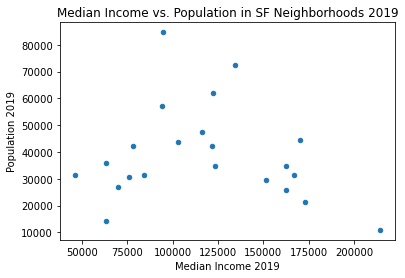

In [20]:
# create a bar chart to show the relationship between median income in a neighborhood and its population
sf_neighborhoods_df.sort_values(by='Median Income 2019',ascending=True).plot(kind='scatter',x='Median Income 2019',
                                                                             y='Population 2019')
plt.title('Median Income vs. Population in SF Neighborhoods 2019') # add a title to the histogram

plt.show()

## Getting neighborhood venues data with the Foursquare API

The SF neighborhoods are explored using the Foursquare API to retrieve data on venues located within each neighborhood. The venues for each neighborhood  are grouped by venue category and counted. To produce more meaningful analysis, similar venue categories are further grouped together into larger categories. For example, all restaurants are combined into a 'Restaurants' category.

The final venue categories are:
- Restaurants
- Cafes/Desserts
- Food joints
- Businesses
- Gym/Sports
- Grocery/Markets
- Health/Wellness
- Pts of Attraction
- Transportation
- Retail
- Home/Garden
- Bars/Nightlife
- Auto/Gas
- Arts
- Lodging             
- Finance

Because the population varies in each neighborhood, the total venue counts for each category are then normalized by dividing over the neighborhood population. This generates a venues per capita number which can then be further analyzed.

In [21]:
# set up variables for Foursquare API calls
CLIENT_ID = '45RWHYIWJUYUR5YJSFTXNWNNAPUKTEN4MQ5YYZRMHKPWT4IG' # your Foursquare ID
CLIENT_SECRET = 'QGPJZOPUUEW51P0JRBBVPJETGWPMWX20A5BWES33AAOY4SKQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

This function will call on the Foursquare API to explore venues based on a location.

Inputs: 
- names: series containing neighborhood names
- latitudes: series containing latitude values
- longitudes: series containing longitude values
- radius: sets radial distance to explore around the latitude, longitude. default is 500 meters

Returns a Pandas dataframe nearby_venues containing venue information such as name, latitude, longitude, category

In [22]:
# function that uses Foursquare API that get venues for specific locations
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[] # initialize a blank list to hold the venues
    for name, lat, lng in zip(names, latitudes, longitudes):
                    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    # converts the nearby_venues list into a Pandas dataframe and renames the columns
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
# create separate series for the latitude, longitude, and neighborhoods from the tor_df_short dataframe
neighborhood_latitudes = sf_neighborhoods_df['Latitude'] # neighborhood latitude value
neighborhood_longitudes = sf_neighborhoods_df['Longitude'] # neighborhood longitude value
neighborhood_zip = sf_neighborhoods_df.index
# ['Zipcode'] # neighborhood names

# create a dataframe of Toronto venues by calling getNearbyVenues function
sf_venues = getNearbyVenues(neighborhood_zip, neighborhood_latitudes, neighborhood_longitudes)
sf_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,94102,37.7795,-122.419233,Louise M. Davies Symphony Hall,37.777976,-122.420157,Concert Hall
1,94102,37.7795,-122.419233,War Memorial Opera House,37.778601,-122.420816,Opera House
2,94102,37.7795,-122.419233,Herbst Theater,37.779548,-122.420953,Concert Hall
3,94102,37.7795,-122.419233,San Francisco Ballet,37.778580,-122.420798,Dance Studio
4,94102,37.7795,-122.419233,Asian Art Museum,37.780178,-122.416505,Art Museum
5,94102,37.7795,-122.419233,War Memorial Court,37.779042,-122.420971,Park
6,94102,37.7795,-122.419233,Main Stage Of Davies Symphony Hall,37.777703,-122.420476,Performing Arts Venue
7,94102,37.7795,-122.419233,Philz Coffee,37.781266,-122.416901,Coffee Shop
8,94102,37.7795,-122.419233,Siam Orchid Traditional Thai Massage,37.777111,-122.417967,Massage Studio
9,94102,37.7795,-122.419233,"Books, Inc.",37.781614,-122.420531,Bookstore


This code creates a dataframe showing the frequency of each venue category within each neighborhood. This is done by first converting the categorical variable 'Venue Category' into an indicator variable. The frequency in each neighborhood is then calculated by grouping by the Neighborhood and taking the mean.

In [47]:
# one hot encoding using get_dummies to convert categorical variables into indicator variables
sf_onehot = pd.get_dummies(sf_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sf_onehot['Zipcode'] = sf_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sf_onehot.columns[-1]] + list(sf_onehot.columns[:-1])
sf_onehot = sf_onehot[fixed_columns]

# group by neighborhood and calculate the sum frequency of each venue type
sf_grouped = sf_onehot.groupby('Zipcode').sum().reset_index()
sf_grouped

,Zipcode,ATM,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Bike Shop,Board Shop,Bookstore,Boutique,Bowling Green,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Space,Eye Doctor,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Health & Beauty Service,Herbs & Spices Store,Hill,Historic Site,History Museum,Hobby Shop,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Opera House,Optical Shop,Other Nightlife,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shipping Store,Shoe Store,Shopping Mall,Sicilian Restaurant,Smoke Shop,Smoothie Shop,Soccer Field,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Trattoria/Osteria,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,94102,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,3,0,0,0,1,3,0,0,0,1,2,0,0,0,0,0,0,2,0,1,0,0,0,0,0,1,0,0,3,4,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,2,0,1,0,0,1

In [48]:
# set the index for the dataframe to be the zipcode
sf_grouped.set_index('Zipcode',inplace=True)
sf_grouped.head()

,ATM,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Bike Shop,Board Shop,Bookstore,Boutique,Bowling Green,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Space,Eye Doctor,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Health & Beauty Service,Herbs & Spices Store,Hill,Historic Site,History Museum,Hobby Shop,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Opera House,Optical Shop,Other Nightlife,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shipping Store,Shoe Store,Shopping Mall,Sicilian Restaurant,Smoke Shop,Smoothie Shop,Soccer Field,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Trattoria/Osteria,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
Zipcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
94102,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,3,0,0,0,1,3,0,0,0,1,2,0,0,0,0,0,0,2,0,1,0,0,0,0,0,1,0,0,3,4,0,2,0,

This custom function helps to consolidate similar venue categories into a new, larger category.
Inputs:
- dataframe: dataframe holding the venue category by neighborhood data
- cols_list: list holding strings for all the column names (venue categories) that should be combined together
- new_col_name: string for the new category name

Outputs:
- returns a modified dataframe with the combined venue category counts as a new column and the individual venue category columns dropped

In [26]:
# create a function that takes in a dataframe, a list of column names, and a new column name
# the function sums all the counts in the dataframe from the list of column names and puts this value into a new column
# the function returns the modified dataframe

def df_combine_cols(df,cols_list,new_col_name):
    # create a new dataframe which is a subset of the original df using only the columns in the cols_list
    df_subset = df.filter(items=cols_list)
    
    # remove the columns from the dataframe
    df.drop(df_subset.columns, axis=1, inplace=True)
    
    # create a new column names new_col_name with the sum value of the removed columns
    df[new_col_name] = df_subset.sum(axis=1)
    
    # returns the modified dataframe
    return df

This section of code creates the custom larger categories for grouping of similar venue categories. This is done largely manually, by going through the various venue categories returned by the Foursquare API and deciding myself which categories should be grouped together.

The final venue categories are:
- Restaurants
- Cafes/Desserts
- Food joints
- Businesses
- Gym/Sports
- Grocery/Markets
- Health/Wellness
- Pts of Attraction
- Transportation
- Retail
- Home/Garden
- Bars/Nightlife
- Auto/Gas
- Arts
- Lodging             
- Finance

In [49]:
# group the venue categories into custom groups
# create a list of all column names for Restaurants
restaurants_list = ['Breakfast Spot','Diner','Gastropub','Noodle House','Pizza Place','Steakhouse','Trattoria/Osteria']
restaurants_list = restaurants_list + sf_grouped.filter(regex='Restaurant').columns.tolist()

# create a list of all column names for Bars/Nightlife
bars_list = sf_grouped.filter(regex='Bar').columns.tolist()
bars_list.remove('Salon / Barbershop')
bars_list.remove('Juice Bar')
bars_list = bars_list + ['Beer Garden','Brewery','Comedy Club','Irish Pub','Jazz Club','Lounge','Music Venue','Nightclub',
                         'Other Nightlife','Pub','Rock Club','Roof Deck','Speakeasy']

# create a list for food joints, quick food
food_joints = ['BBQ Joint','Burger Joint','Burrito Place','Food & Drink Shop','Food','Food Court','Food Stand','Food Truck',
               'Fried Chicken Joint','Hot Dog Joint','Poke Place','Salad Place','Sandwich Place','Street Food Gathering',
               'Taco Place','Wings Joint']

# create a list for grocery stores and markets
grocery_list = ['Candy Store','Cheese Shop','Chocolate Shop','Convenience Store','Deli / Bodega','Farmers Market',
                'Fish Market','Flower Shop','Gourmet Shop','Grocery Store','Herbs & Spices Store','Liquor Store','Market',
                'Sausage Shop','Supermarket','Wine Shop']

# create a list for all cafes, dessert shops, bakeries, etc.
cafe_desserts = ['Bagel Shop','Bakery','Bubble Tea Shop','Café','Coffee Shop','Creperie','Cupcake Shop','Dessert Shop',
                 'Donut Shop','Frozen Yogurt Shop','Ice Cream Shop','Juice Bar','Smoothie Shop','Tea Room']

# create a list for all arts and entertainment
arts_list = ['Amphitheater','Art Gallery','Art Museum','Concert Hall','Event Space','General Entertainment','History Museum',
             'Indie Movie Theater','Indie Theater','Opera House','Performing Arts Venue','Public Art','Sculpture Garden',
             'Street Art','Theater']

# create a list for all gyms and sports related venues
gym_sports_list = ['Athletics & Sports','Baseball Field','Basketball Court','Bowling Green','Cycle Studio','Dance Studio','Golf Course',
                   'Gym','Gym / Fitness Center','Gymnastics Gym','Martial Arts School','Pilates Studio','Pool',
                   'Skate Park','Soccer Field','Tennis Court','Yoga Studio','Volleyball Court']

# create a list for all general points of attraction
pts_attraction_list = ['Beach','Church','Field','Fountain','Garden','Harbor / Marina','Hill','Historic Site','Intersection',
                       'Lake','Library','Monument / Landmark','Park','Pedestrian Plaza','Playground','Plaza',
                       'Scenic Lookout','Trail','Tree','Tourist Information Center']

# create a list for all transportation venues
transport_list = ['Bus Line','Bus Station','Bus Stop','Light Rail Station','Metro Station','Rental Car Location',
                  'Train Station']

# create a list for all financial related venues
finance_list = ['ATM','Bank','Credit Union']

# create a list for auto related venues
auto_list = ['Auto Garage','Auto Workshop','Gas Station','Motorcycle Shop']

# create a list for health, beauty, and wellness venues
health_list = ['Alternative Healer','Chiropractor','Eye Doctor','Health & Beauty Service','Marijuana Dispensary',
               'Massage Studio','Nail Salon','Optical Shop','Pharmacy','Salon / Barbershop','Spa','Supplement Shop']

# create a list for all home, home improvement, and garden venues
home_garden_list = ['Furniture / Home Store','Garden Center','Hardware Store','Kitchen Supply Store','Mattress Store']

# create a list for loding related venues
lodging_list = ['Hotel','Motel']

# create a list for general retail venues
retail_list = ['Accessories Store','Adult Boutique','Antique Shop','Arts & Crafts Store','Bike Shop','Board Shop','Bookstore',
              'Boutique','Camera Store','Clothing Store','Cosmetics Shop','Department Store','Dry Cleaner',
               'Electronics Store','Gift Shop','Hobby Shop','Jewelry Store','Kids Store','Lingerie Store',"Men's Store",
               'Miscellaneous Shop','Mobile Phone Shop','Music Store','Newsstand','Paper / Office Supplies Store','Pet Store',
               'Photography Lab','Record Shop','Shipping Store','Shoe Store','Shopping Mall','Smoke Shop',
               'Sporting Goods Shop','Stationery Store','Thrift / Vintage Store','Toy / Game Store',"Women's Store"]

# create a list for businesses and services
businesses_list = ['Business Service','Design Studio','Distillery','Dog Run','Entertainment Service','Laundromat',
                   'Music School','Office','Photography Studio','Recording Studio','Frame Store']

This code iterates through the various venue category lists and updates the venues dataframe by combining similar categories. The custom function df_combine_cols() is called to perform this task.

In [50]:
# create a list of new category names for grouping of the venue categories
new_cols_list = ['Restaurants','Bars/Nightlife','Food joints','Grocery/Markets','Cafes/Desserts','Arts','Gym/Sports',
                 'Pts of Attraction','Transportation','Finance','Auto/Gas','Health/Wellness','Home/Garden','Lodging',
                 'Retail','Businesses']

# create a list of subset categories
# each subset category is a list of column names to be grouped together into a new grouping
subset_list = [restaurants_list,bars_list,food_joints,grocery_list,cafe_desserts,arts_list,gym_sports_list,
               pts_attraction_list,transport_list,finance_list,auto_list,health_list,home_garden_list,lodging_list,
               retail_list,businesses_list]

# iterate through each of the subset categories and modify the sf_grouped dataframe to combine venue categories into a new subset
for count,sub_list in enumerate(subset_list):
    sf_grouped = df_combine_cols(sf_grouped,sub_list,new_cols_list[count])

sf_grouped.head()  

,Restaurants,Bars/Nightlife,Food joints,Grocery/Markets,Cafes/Desserts,Arts,Gym/Sports,Pts of Attraction,Transportation,Finance,Auto/Gas,Health/Wellness,Home/Garden,Lodging,Retail,Businesses
Zipcode,,,,,,,,,,,,,,,,
94102,21,15,10,4,11,8,2,2,0,1,0,4,1,4,6,2
94103,13,30,6,2,9,7,6,0,0,0,4,3,4,1,7,1
94105,18,6,20,5,29,2,9,3,0,0,0,5,0,0,2,1
94107,2,1,10,1,3,0,7,5,0,0,0,0,0,0,2,2
94108,25,7,2,2,18,5,5,5,0,1,0,2,2,8,15,0


In [51]:
# view the summary statistics for the venue dataframe
sf_grouped.describe()

,Restaurants,Bars/Nightlife,Food joints,Grocery/Markets,Cafes/Desserts,Arts,Gym/Sports,Pts of Attraction,Transportation,Finance,Auto/Gas,Health/Wellness,Home/Garden,Lodging,Retail,Businesses
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,15.545455,5.409091,4.272727,3.590909,8.500000,1.545455,3.454545,3.590909,0.727273,0.318182,0.272727,2.136364,0.590909,0.818182,5.772727,0.681818
std,11.574715,6.939597,4.772758,2.986622,7.601692,2.463588,2.685539,2.938401,1.638287,0.567900,0.882735,2.030610,1.098011,1.893255,6.046895,0.646335
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.250000,1.000000,0.250000,1.000000,2.250000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,1.250000,0.000000
50%,16.000000,3.000000,3.000000,3.500000,9.000000,0.000000,2.500000,3.500000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,4.000000,1.000000
75%,24.250000,6.750000,5.750000,5.750000,11.000000,1.750000,5.750000,5.000000,0.750000,0.750000,0.000000,3.000000,1.000000,0.750000,7.750000,1.000000
max,36.000000,30.000000,20.000000,10.000000,29.000000,8.000000,9.000000,11.000000,6.000000,2.000000,4.000000,8.000000,4.000000,8.000000,23.000000,2.000000


In [52]:
# calculate the total number of venues in each venue category
sf_grouped.sum()

Restaurants          342
Bars/Nightlife       119
Food joints           94
Grocery/Markets       79
Cafes/Desserts       187
Arts                  34
Gym/Sports            76
Pts of Attraction     79
Transportation        16
Finance                7
Auto/Gas               6
Health/Wellness       47
Home/Garden           13
Lodging               18
Retail               127
Businesses            15
dtype: int64

### Normalization of the venue category data
Because each neighborhood has a different population size, the venue category data is normalized by dividing the venue counts by each neighborhoods population. This prevents skewed analysis where larger population neighborhoods may inherently have more particular venues simply because there is a larger population to serve.

In [54]:
# normalize the data by calculating the per capita venue counts
# divide venue category counts by each zipcodes population
sf_grouped_per_capita = sf_grouped.div(sf_neighborhoods_df['Population 2019'],axis=0)
sf_grouped_per_capita

,Restaurants,Bars/Nightlife,Food joints,Grocery/Markets,Cafes/Desserts,Arts,Gym/Sports,Pts of Attraction,Transportation,Finance,Auto/Gas,Health/Wellness,Home/Garden,Lodging,Retail,Businesses
Zipcode,,,,,,,,,,,,,,,,
94102,0.000669,0.000478,0.000319,0.000127,0.000350,0.000255,0.000064,0.000064,0.000000,0.000032,0.000000,0.000127,0.000032,0.000127,0.000191,0.000064
94103,0.000423,0.000977,0.000195,0.000065,0.000293,0.000228,0.000195,0.000000,0.000000,0.000000,0.000130,0.000098,0.000130,0.000033,0.000228,0.000033
94105,0.001649,0.000550,0.001832,0.000458,0.002657,0.000183,0.000824,0.000275,0.000000,0.000000,0.000000,0.000458,0.000000,0.000000,0.000183,0.000092
94107,0.000064,0.000032,0.000318,0.000032,0.000095,0.000000,0.000222,0.000159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000064,0.000064
94108,0.001768,0.000495,0.000141,0.000141,0.001273,0.000354,0.000354,0.000354,0.000000,0.000071,0.000000,0.000141,0.000141,0.000566,0.001061,0.000000
94109,0.000506,0.000157,0.000052,0.000140,0.000175,0.000000,0.000052,0.000070,0.000017,0.000000,0.000000,0.000035,0.000000,0.000017,0.000140,0.000000
94110,0.000304,0.000041,0.000097,0.000138,0.000124,0.000069,0.000069,0.000028,0.000014,0.000000,0.000000,0.000028,0.000000,0.000000,0.000055,0.000000
94112,0.000142,0.000012,0.000059,0.000024,0.000024,0.000000,0.000012,0.000000,0.000071,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000
94114,0.000401,0.000258,0.000000,0.000229,0.000315,0.000086,0.000143,0.000286,0.000057,0.000000,0.000000,0.000086,0.000029,0.000000,0.000200,0.000029


## Analysis of Venues per Capita vs. Median Income in SF neighborhoods
Now that the Foursquare venues data has been gathered, cleaned, and normalized, subsequent analysis can begin. Namely, the purpose of this study is to see if neighborhood median income is correlated with the number of venues per capita, as well as the venue category. 

In [55]:
# create a dataframe to show the total number of venues per capita in each SF neighborhood
sf_grouped_per_capita_sum = sf_grouped_per_capita.sum(axis=1).to_frame()
sf_grouped_per_capita_sum.columns=['Total venues per capita']

# add a column for the Median income
sf_grouped_per_capita_sum['Median Income'] = sf_neighborhoods_df['Median Income 2019']
sf_grouped_per_capita_sum

,Total venues per capita,Median Income
Zipcode,,
94102,0.002899,46372
94103,0.003029,75764
94105,0.009161,213987
94107,0.001049,166985
94108,0.006859,63263
94109,0.001361,94278
94110,0.000967,134592
94112,0.000354,94757
94114,0.002119,162193


This creates a chart to see the relationship between a neighborhoods median income and the total number of venues per capita (all venues).

The chart shows that the most affluent neighborhood has the highest number of venues per capita. Interestingly, the second lowest median income neighborhood follows with the 2nd highest number of venues per capita.

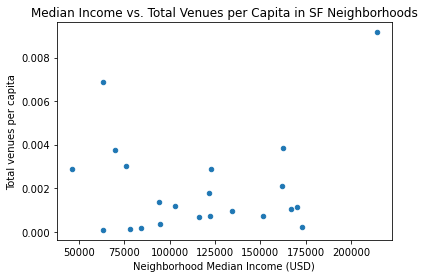

In [71]:
# create a bar chart showing the relationship between Median Income and Total venues per capita
sf_grouped_per_capita_sum.sort_values(by='Median Income',ascending=True).plot(kind='scatter',x='Median Income',
                                                                              y='Total venues per capita')
plt.title('Median Income vs. Total Venues per Capita in SF Neighborhoods') # add a title to the histogram
plt.ylabel('Total venues per capita')
plt.xlabel('Neighborhood Median Income (USD)')
plt.show()

In [57]:
# add the median income for each neighborhood/zipcode into the dataframe
sf_grouped_per_capita['Median Income'] = sf_neighborhoods_df['Median Income 2019']
sf_grouped_per_capita.head()

,Restaurants,Bars/Nightlife,Food joints,Grocery/Markets,Cafes/Desserts,Arts,Gym/Sports,Pts of Attraction,Transportation,Finance,Auto/Gas,Health/Wellness,Home/Garden,Lodging,Retail,Businesses,Median Income
Zipcode,,,,,,,,,,,,,,,,,
94102,0.000669,0.000478,0.000319,0.000127,0.000350,0.000255,0.000064,0.000064,0.0,0.000032,0.00000,0.000127,0.000032,0.000127,0.000191,0.000064,46372
94103,0.000423,0.000977,0.000195,0.000065,0.000293,0.000228,0.000195,0.000000,0.0,0.000000,0.00013,0.000098,0.000130,0.000033,0.000228,0.000033,75764
94105,0.001649,0.000550,0.001832,0.000458,0.002657,0.000183,0.000824,0.000275,0.0,0.000000,0.00000,0.000458,0.000000,0.000000,0.000183,0.000092,213987
94107,0.000064,0.000032,0.000318,0.000032,0.000095,0.000000,0.000222,0.000159,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000064,0.000064,166985
94108,0.001768,0.000495,0.000141,0.000141,0.001273,0.000354,0.000354,0.000354,0.0,0.000071,0.00000,0.000141,0.000141,0.000566,0.001061,0.000000,63263


### Analysis of the correlation beteween venues per capita and the neighborhood median income
The Pearson Correlation Coefficient is calculated between the venues per capita (for each venue category) and the neighborhood median income. 

The Pearson Correlation Coefficient indicates if there is a correlation between the data. This value ranges between -1 to +1. Values whose absolute value is closer to 1 indicate a stronger correlation, and values closer to zero indicate a weaker correlation. Positive correlation coefficients indicate that the two variables move together; an increase in one is correlated to an increase in the other. The opposite is true for negative correlation coefficients.

In [58]:
# determine the correlation between median income and venue category counts
income_venue_corr = sf_grouped_per_capita.corr()['Median Income'].sort_values(ascending=False).drop(labels='Median Income')
income_venue_corr

Food joints          0.439616
Gym/Sports           0.393195
Businesses           0.388447
Grocery/Markets      0.357510
Health/Wellness      0.310968
Cafes/Desserts       0.288786
Pts of Attraction    0.234615
Transportation       0.166585
Restaurants          0.042191
Retail              -0.021882
Bars/Nightlife      -0.193068
Home/Garden         -0.208350
Auto/Gas            -0.211488
Arts                -0.250921
Lodging             -0.365057
Finance             -0.487516
Name: Median Income, dtype: float64

A horizontal bar chart is created to show the Pearson Correlation Coeffcieint for each of the venue categories vs. neighborhood median income. 

Red bars indicate a negative correlation and green bars indicate a postivie correlation. The bar chart is ordered from most negative to most positive correlation coefficient.

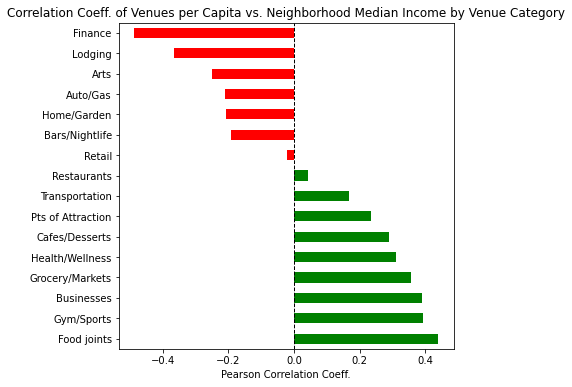

In [59]:
# plot the Pearson correlation coefficient for each category
# show positive correlation in green bars and negative correlation in red bars
income_venue_corr.plot(kind='barh',color=(income_venue_corr > 0).map({True: 'g',False: 'r'}),
                                title='Correlation Coeff. of Venues per Capita vs. Neighborhood Median Income by Venue Category',
                       figsize=(6,6))

# add label for horizontal axis
plt.xlabel('Pearson Correlation Coeff.')

# add a vertical line at x=0 to help distinguish between positive and negative values
plt.axvline(x=0, color='black', linestyle='--', lw=1)
plt.show()

### Correlation Coefficient strength
The correlation coefficients for each venue cateogry vs. neighborhood median income are evaluted for their strength of correlation. As mentioned above, absolute values closer to 1 indicate stronger correlation and values closer to 0 indicate weaker correlation.

The following criteria was used to determine the correlation coefficient strength:
- Absolute values between 0 and 0.2: Very Weak
- Absolute values between 0.2 and 0.4: Weak
- Absolute values between 0.4 and 0.6: Moderate
- Absolute values between 0.6 and 0.8: Strong
- Absolute Values between 0.8 and 1: Very Strong

In [60]:
# change the income_venue_corr Series into a Dataframe object
income_venue_df = income_venue_corr.to_frame()

# rename the column name
income_venue_df.columns = ['Correlation Coefficient']
income_venue_df

,Correlation Coefficient
Food joints,0.439616
Gym/Sports,0.393195
Businesses,0.388447
Grocery/Markets,0.357510
Health/Wellness,0.310968
Cafes/Desserts,0.288786
Pts of Attraction,0.234615
Transportation,0.166585
Restaurants,0.042191
Retail,-0.021882


In [61]:
# create a list of conditionals to help separate the categories based on the strength of the correlation coefficient
corr_conditions = [(abs(income_venue_df['Correlation Coefficient']) >= 0.8),
                   (abs(income_venue_df['Correlation Coefficient']) >= 0.6),
                   (abs(income_venue_df['Correlation Coefficient']) >= 0.4),
                   (abs(income_venue_df['Correlation Coefficient']) >= 0.2),
                  (abs(income_venue_df['Correlation Coefficient']) < 0.2)]

# define the categories of strength for the correlation coefficient
corr_strengths = ['Very Strong','Strong','Moderate','Weak','Very Weak']

# add a new column into the dataframe for Correlation Strength based on the value of the correlation coefficient
income_venue_df['Correlation Strength'] = np.select(corr_conditions, corr_strengths)
income_venue_df

,Correlation Coefficient,Correlation Strength
Food joints,0.439616,Moderate
Gym/Sports,0.393195,Weak
Businesses,0.388447,Weak
Grocery/Markets,0.357510,Weak
Health/Wellness,0.310968,Weak
Cafes/Desserts,0.288786,Weak
Pts of Attraction,0.234615,Weak
Transportation,0.166585,Very Weak
Restaurants,0.042191,Very Weak
Retail,-0.021882,Very Weak


The data shows only 2 venue categories with Moderate correlation coefficient strength.
1. Food joints (r=0.44)
1. Finance (r=-0.49)

Two other venue categories show correlation coefficients very near the cutoff for a Moderate strength.
1. Gym/Sports (r=0.39)
1. Businesses (r=0.39)

Further analysis of these 4 venue categories is shown by creating scatter plots for each category. Each scatter plot shows the neighborhood median income vs. the venues per capita for that particular venue category. These plots give you a visualization of the correlation. 

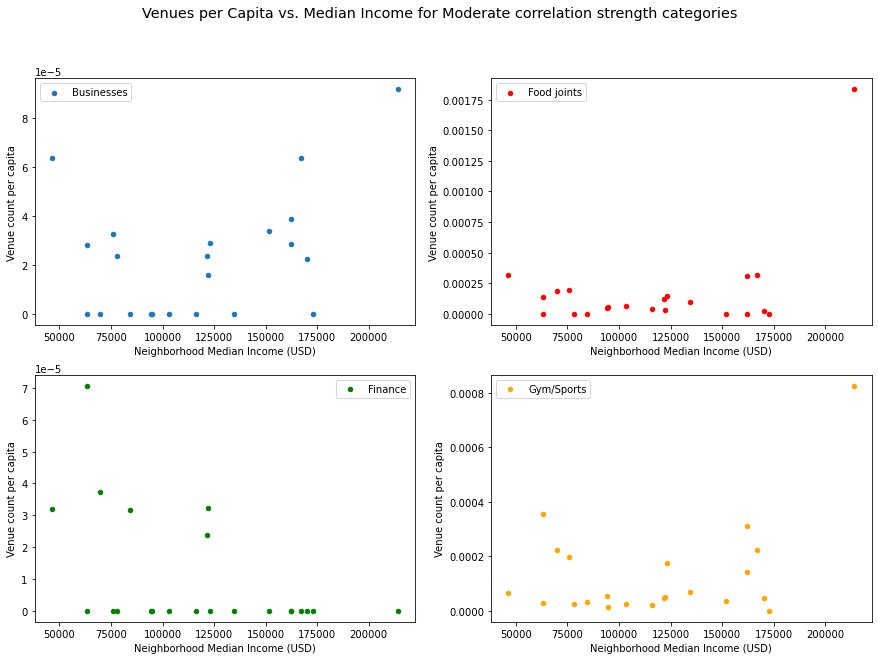

In [62]:
# create a plot with 4 subplots
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# plot each of the 4 venue categories with Moderate correlation coefficient strength
# scatter plots generated with venues per capita vs. median income
sf_grouped_per_capita.plot(kind='scatter',x='Median Income',y='Businesses',label='Businesses',ax=axs[0,0])
sf_grouped_per_capita.plot(kind='scatter',x='Median Income',y='Food joints',label='Food joints',color='red',ax=axs[0,1])
sf_grouped_per_capita.plot(kind='scatter',x='Median Income',y='Finance',label='Finance',color='green',ax=axs[1,0])
sf_grouped_per_capita.plot(kind='scatter',x='Median Income',y='Gym/Sports',label='Gym/Sports',color='orange',ax=axs[1,1])

# label x and y-labels for each subplot
for ax in axs.flat:
    ax.set(xlabel='Neighborhood Median Income (USD)', ylabel='Venue count per capita')

# add a figure title
fig.suptitle('Venues per Capita vs. Median Income for Moderate correlation strength categories',fontsize='x-large')
plt.show()

From the plots above, we can easily see why the correlation coefficients are only moderate strength. In all scatter plots, many of the points are clustered near similar values and do not follow any strong, obvious trend.

For Food Joints and Gym/Sports, most all the neighborhoods, regardless of median income, have venues per capita at similar values. It is the single affluent neighborhood that has significantly higher venues per capita than the rest of the data. 

For Businesses, the data points seem to be more random, but do trend to have higher venues per capita as the neighborhood median income rises.

For Finance venues, there is indeed a negative correlation seen. However, many of the neighborhoods have 0 venues per capita, so the low sample size may be skewing the data.

In [63]:
# drop the most affluent neighborhood, zipcode 94105, and recalculate the correlation coefficients
sf_grouped_per_capita.drop(labels='94105').corr()['Median Income'].sort_values()

Finance             -0.493274
Arts                -0.453393
Bars/Nightlife      -0.415737
Lodging             -0.376541
Cafes/Desserts      -0.300493
Restaurants         -0.236064
Auto/Gas            -0.207751
Home/Garden         -0.176601
Health/Wellness     -0.132880
Food joints         -0.091576
Retail              -0.021459
Gym/Sports          -0.016621
Grocery/Markets      0.002748
Pts of Attraction    0.120785
Businesses           0.135983
Transportation       0.240821
Median Income        1.000000
Name: Median Income, dtype: float64

As shown above, if we drop the most affluent neighborhood from the data and recalculate the correlation coeffcieints, then we easily see that Food joints, Gym/Sports, and Businesses suddendly drop in correlation strength.

Interestingly, this also causes the categories of Arts and Bars/Nightlife to increase in correlation strength to the Moderate level.

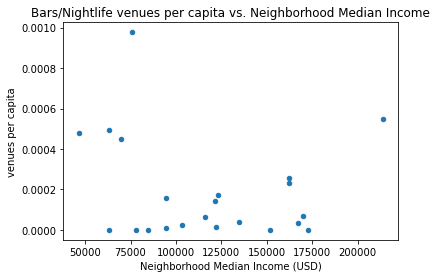

In [64]:
ax = sf_grouped_per_capita.plot(kind='scatter',x='Median Income',y='Bars/Nightlife')
ax.set(xlabel='Neighborhood Median Income (USD)',ylabel='venues per capita')
ax.set_title('Bars/Nightlife venues per capita vs. Neighborhood Median Income')
plt.show()

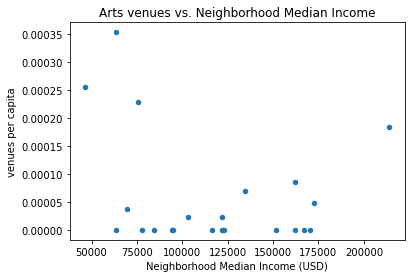

In [65]:
ax = sf_grouped_per_capita.plot(kind='scatter',x='Median Income',y='Arts')
ax.set(xlabel='Neighborhood Median Income (USD)',ylabel='venues per capita')
ax.set_title('Arts venues vs. Neighborhood Median Income')
plt.show()

### Separation of Restaurants, Food joints, and Cafes/Desserts categories
The above analysis had separate categories for Restaurants, Food joints, and Cafes/Desserts. From the subsequent analysis, we can see why this could be useful.

A new category called All Food is created to combine the 3 venue categories listed above. The correlation coefficient vs. neighborhood median income can be calculated for this new category and compared to the correlation coefficients for the separate categories.

In [66]:
# add a category for 'All Food' into the dataframe which combines the Restaurnats and Food Joints categeories
sf_grouped_per_capita['All Food']=sf_grouped_per_capita['Restaurants']+sf_grouped_per_capita['Food joints']+sf_grouped_per_capita['Cafes/Desserts']
sf_grouped_per_capita.head()

,Restaurants,Bars/Nightlife,Food joints,Grocery/Markets,Cafes/Desserts,Arts,Gym/Sports,Pts of Attraction,Transportation,Finance,Auto/Gas,Health/Wellness,Home/Garden,Lodging,Retail,Businesses,Median Income,All Food
Zipcode,,,,,,,,,,,,,,,,,,
94102,0.000669,0.000478,0.000319,0.000127,0.000350,0.000255,0.000064,0.000064,0.0,0.000032,0.00000,0.000127,0.000032,0.000127,0.000191,0.000064,46372,0.001338
94103,0.000423,0.000977,0.000195,0.000065,0.000293,0.000228,0.000195,0.000000,0.0,0.000000,0.00013,0.000098,0.000130,0.000033,0.000228,0.000033,75764,0.000912
94105,0.001649,0.000550,0.001832,0.000458,0.002657,0.000183,0.000824,0.000275,0.0,0.000000,0.00000,0.000458,0.000000,0.000000,0.000183,0.000092,213987,0.006138
94107,0.000064,0.000032,0.000318,0.000032,0.000095,0.000000,0.000222,0.000159,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000064,0.000064,166985,0.000477
94108,0.001768,0.000495,0.000141,0.000141,0.001273,0.000354,0.000354,0.000354,0.0,0.000071,0.00000,0.000141,0.000141,0.000566,0.001061,0.000000,63263,0.003182


In [67]:
# calculate the correlation coefficients with the new 'All Food' category included
# show the food related rows only
sf_grouped_per_capita.corr()['Median Income'].loc[['Restaurants','Food joints','Cafes/Desserts','All Food']]

Restaurants       0.042191
Food joints       0.439616
Cafes/Desserts    0.288786
All Food          0.259826
Name: Median Income, dtype: float64

As shown in the results above, All Food combined shows a Weak correlation of only 0.25. If we only evaluated this category we would not see that Food joints in fact has a stronger correlation with neighborhood median income than the other food related categories.

In [68]:
foods_df = sf_grouped_per_capita[['Restaurants','Food joints','Cafes/Desserts','All Food','Median Income']].sort_values(
    by='Food joints',ascending=False)
foods_df

,Restaurants,Food joints,Cafes/Desserts,All Food,Median Income
Zipcode,,,,,
94105,0.001649,0.001832,0.002657,0.006138,213987
94102,0.000669,0.000319,0.000350,0.001338,46372
94107,0.000064,0.000318,0.000095,0.000477,166985
94123,0.001390,0.000309,0.000348,0.002047,162206
94103,0.000423,0.000195,0.000293,0.000912,75764
94133,0.001232,0.000187,0.000597,0.002015,69756
94115,0.000809,0.000144,0.000607,0.001561,123037
94108,0.001768,0.000141,0.001273,0.003182,63263
94118,0.000689,0.000119,0.000285,0.001093,121644


We can further visualize the differences in these food-related venues by visualizing the 3 categories in a scatter plot.

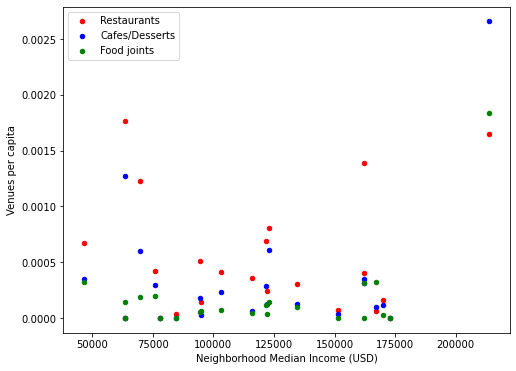

In [69]:
ax = foods_df.plot(kind='scatter',x='Median Income',y='Restaurants',label='Restaurants',color='red',figsize=(8,6))
foods_df.plot(kind='scatter',x='Median Income',y='Cafes/Desserts',label='Cafes/Desserts',color='blue',ax=ax)
foods_df.plot(kind='scatter',x='Median Income',y='Food joints',label='Food joints',color='green',ax=ax)

ax.set(xlabel='Neighborhood Median Income (USD)',ylabel='Venues per capita')
plt.show()

As shown in the plot above, we see that Restaurants, which has the weakest correlation coefficient, appears less dependent on the median income of the neighborhood (red dots). The three neighborhoods with the highest restaurants per capita are spread out amongst the median income distribution.

As for Cafes/Desserts and Food joints, clearly the most affluent neighborhood has the highest venues per capita for both of these categories (blue and green dots).